In [52]:
import csv
import cv2
import matplotlib.pyplot as plt


lines = []

with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images_center, images_left, images_right = [], [], []
angles_center, angles_left, angles_right = [], [], [] # images and steering measurements
images, angles = [], []

for line in lines:
    name = './data/IMG/'+line[0].split('/')[-1]
    image = cv2.imread(name)
    images_center.append(image)
    name = './data/IMG/'+line[1].split('/')[-1]
    image = cv2.imread(name)
    images_left.append(image)
    name = './data/IMG/'+line[2].split('/')[-1]
    image = cv2.imread(name)
    images_right.append(image)
    angle_center = float(line[3])
    angle_left = angle_center + 0.2
    angle_right = angle_center - 0.2
    
    angles_center.append(angle_center)
    angles_left.append(angle_left)
    angles_right.append(angle_right)
    
def read_image(image_name):
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

4056


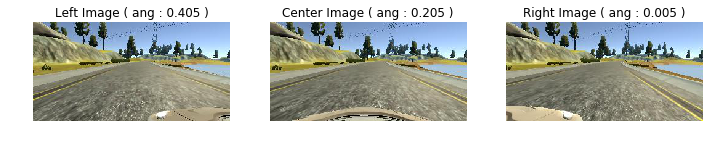

In [15]:
import numpy as np

rnd = np.random.randint(len(images_center))

image_c = cv2.cvtColor(images_center[rnd], cv2.COLOR_BGR2RGB)
image_l = cv2.cvtColor(images_left[rnd], cv2.COLOR_BGR2RGB)
image_r = cv2.cvtColor(images_right[rnd], cv2.COLOR_BGR2RGB)
print ('Random Number = ', rnd)
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(image_l)
plt.title('Left Image ( ang : ' + str(np.round(angles[rnd]+0.2,3)) + ' )')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(image_c)
plt.title('Center Image ( ang : ' + str(np.round(angles[rnd],3)) + ' )')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(image_r)
plt.title('Right Image ( ang : ' + str(np.round(angles[rnd]-0.2, 3)) + ' )')
plt.axis('off')
plt.show()

In [53]:
#print(len(angles_center), len(angles_left), len(angles_right))
angles = np.concatenate((angles_center, angles_left, angles_right), axis=0)
images = np.concatenate((images_center, images_left, images_right), axis=0)
#print(angles_left[100], angles[8136])
#print(len(angles))

Random Number =  5325


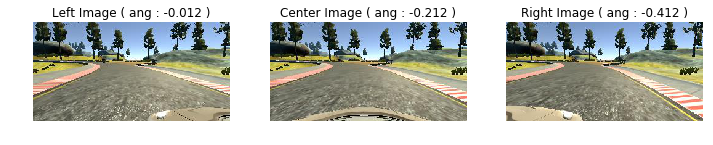

In [60]:
import numpy as np

rnd = np.random.randint(len(images_center))
rnd_l = rnd + len(images_center)
rnd_r = rnd + len(images_center) + len(images_left)
#print(rnd, rnd_l, rnd_r)
#print(len(images))
image_c = cv2.cvtColor(images[rnd], cv2.COLOR_BGR2RGB)
image_l = cv2.cvtColor(images[rnd_l], cv2.COLOR_BGR2RGB)
image_r = cv2.cvtColor(images[rnd_r], cv2.COLOR_BGR2RGB)
#print ('Random Number = ', rnd)
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(image_l)
plt.title('Left Image ( ang : ' + str(np.round(angles[rnd_l],3)) + ' )')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(image_c)
plt.title('Center Image ( ang : ' + str(np.round(angles[rnd],3)) + ' )')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(image_r)
plt.title('Right Image ( ang : ' + str(np.round(angles[rnd_r], 3)) + ' )')
plt.axis('off')
plt.show()

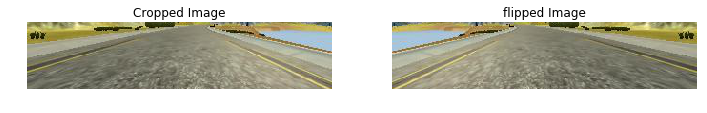

(70, 320, 3) (70, 320, 3)


In [18]:
# check crop range and flip image
crop_image= images_center[rnd][60:130, 0:320] # 160, 320, 3
crop_image = cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB)
flip_image = cv2.flip(crop_image, 1)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('Cropped Image')
plt.imshow(crop_image)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('flipped Image')
plt.imshow(flip_image)
plt.axis('off')
plt.show()
print(crop_image.shape, flip_image.shape)

24108 0


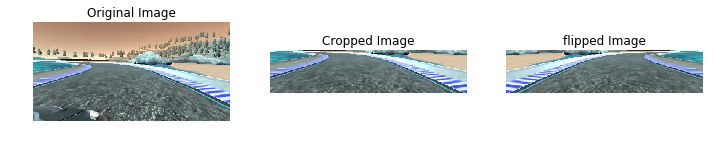

In [65]:
crop_images, flip_images = [], []

for image in images:
    crop_image = image[60:130, 0:320]
    flip_image = cv2.flip(crop_image, 1)
    crop_images.append(crop_image)
    flip_images.append(flip_image)
print(len(images), len(roi_images))

rnd = np.random.randint(len(images))

plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(images[rnd])
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Cropped Image')
plt.imshow(crop_images[rnd])
plt.axis('off')
plt.subplot(1,3,3)
plt.title('flipped Image')
plt.imshow(flip_images[rnd])
plt.axis('off')
plt.show()

In [66]:
angles = np.concatenate((angles, angles*-1), axis=0)
images = np.concatenate((crop_images, flip_images), axis=0)

In [67]:
print(len(angles), len(images))

48216 48216


In [73]:
dataset = []
for img, ang in zip(images, angles):
    tmp = img, ang
    dataset.append(tmp)
print(dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [74]:
print(len(dataset))

48216


In [75]:
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(dataset, test_size=0.2)

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
                
            # trim image to only see section with road
            X_train = np.array(batch_samples[0])
            y_train = np.array(batch_samples[1])
            
            yield sklearn.utils.shuffle(X_train, y_train)
            
# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

In [81]:
print(len(train_samples), len(validation_samples))
print(train_samples[100][0])

38572 9644
[[[ 38  79  88]
  [ 38  79  88]
  [ 38  79  88]
  ..., 
  [205 218 234]
  [207 217 234]
  [209 217 234]]

 [[ 34  74  86]
  [ 35  75  87]
  [ 34  76  88]
  ..., 
  [ 40  67  81]
  [ 37  63  77]
  [ 33  59  73]]

 [[ 30  69  83]
  [ 27  69  82]
  [ 27  69  82]
  ..., 
  [ 81 138 147]
  [ 81 136 145]
  [ 79 134 141]]

 ..., 
 [[108 118 118]
  [103 113 113]
  [ 95 105 105]
  ..., 
  [ 58  74  63]
  [ 52  69  60]
  [ 61  79  72]]

 [[101 116 118]
  [ 98 113 115]
  [ 94 109 111]
  ..., 
  [ 74  63  83]
  [ 77  62  83]
  [ 82  66  84]]

 [[ 92 107 109]
  [ 94 109 111]
  [ 97 112 114]
  ..., 
  [ 61  71  88]
  [ 68  68  86]
  [ 73  67  84]]]


In [76]:
# The model is based on NVIDIA's "End to End Learning for Self-Driving Cars" paper
# Source:  https://arxiv.org/pdf/1604.07316.pdf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Activation, Dropout
from keras.layers import Convolution2D, MaxPooling2D, Cropping2D
keep_prob = 0.5
model = Sequential()
# First Normalize layer, credit to comma ai model
#model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(66, 200, 3)))
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3))) # Normalizing & mean centering the data
model.add(Cropping2D(cropping=((60,30),(0,0)), input_shape=(160, 320, 3)))
# Color space conversion layer, credit to Vivek's model
model.add(Convolution2D(3, 1, 1, border_mode='same', name='color_conv'))
# Classic five convolutional, Nvidia model and additional maxpooling layers
model.add(Convolution2D(24, 5, 5, border_mode='valid', activation='relu', subsample=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Convolution2D(36, 5, 5, border_mode='valid', activation='relu', subsample=(2, 2)))
model.add(Convolution2D(48, 5, 5, border_mode='valid', activation='relu', subsample=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='valid', activation='relu', subsample=(1, 1)))
model.add(Convolution2D(64, 3, 3, border_mode='valid', activation='relu', subsample=(1, 1)))
model.add(Flatten())
# Next, five fully connected layers
model.add(Dense(1164, activation='relu'))
model.add(Dropout(keep_prob))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

Using TensorFlow backend.


In [77]:
model.compile(loss='mse', optimizer='adam')
history_object = model.fit_generator(train_generator, samples_per_epoch=len(train_samples),
                    validation_data=validation_generator,
                    nb_val_samples=len(validation_samples),
                    nb_epoch=7, verbose=1)

model.save('model.h5')

Epoch 1/7


ValueError: Error when checking model input: expected lambda_input_1 to have 4 dimensions, but got array with shape (2, 1)